<a href="https://colab.research.google.com/github/panchamdesai777/Hackathons/blob/master/Weekend_7_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Electronics Price Prediction: Weekend Hackathon #7**

---

![alt text](https://www.machinehack.com/wp-content/uploads/2020/06/electronics_hack_B-1536x864.jpg)



We live in a world that is driven by technology and electronic devices as gadgets have become a part of our daily life. It is near impossible to think of a world without smartphones or tablets. Like many kinds of goods or products, used electronic devices have a good demand in our country. In this hackathon, we challenge the data science community to predict the price of used electronic devices based on certain factors.

Given are 6 distinguishing factors that can influence the price of a used device. Your objective as a data scientist is to build a machine learning model that can predict the price of used electronic devices based on the given factors.



> ***Leaderboard rank*** : **36/117**






In [0]:
#Importing Required Number of Libraries
#Importing Required Libraries
#_______________________________________________________________________________________________________________
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer


In [0]:
from google.colab import files
uploaded = files.upload()

Saving final_train.csv to final_train.csv


In [0]:
!pip install pycaret

In [0]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
train= pd.read_csv(io.BytesIO(uploaded['final_train.csv']))
train

,Unnamed: 0,10,100,1000,10x,10xmax,11,116gb,11900,11pro,12,12000,123,124,12500,128,128gb,128gb25000,128gbname54,128gigs,12900,12999,12999rs,12months,12yr,13,13000rs,131,132mp,13900,13mp,14,14499,14999rs,15,15000,15900,15kg,16,16000,16900,16gb,16mp,16mp8mp,18000,18months,19,19500,19k,1month,1st,1year,1yr,20,2016,2018,2019,2020,20900,20999,21500rs,21900,22,22999rs,23,23000,2372017,23900,24,24000,24900,25,2500,25000,256,256gb,256gigs,256gm,25k,29sep2019,2days,2gb,2month,2months,2nd,2xl,2year,2years,30,30000,31000,31999rs,32,3256,32g,32gb,32gbbrand,32gbexcellent,32gbgold,32gbgood,32gbwarrantysealedcodexchange,32gib,32gigz,332,35,35off,364ligflats,38,3g,3gb,3gb16gb,3gb32gb,3i,4000,4000mah,42,42mm,44,44mm,4500,45900,464,464gb,47900,49,4d,4days,4g,4gb,4gb64gb,4gworking,4month,4months,4th,4x,50,5000,512,512gb,55,5500,59900,5c,5inch,5se,5x,6000,6128,6128gbexcellent,632gb,64,64128gb,64g,64gb,64gbbrand,64gbexcellent,64gbsilver,64gib,64gigs,664,66900,678,6gb,6mnts,6month,6months,6plus,6pluse,6s128,6s128gb,6s16,6s32,6sgood,6th,6x,7000,70000,7128gb,7128gbbrand,7128gbcondition,7128gbexcellent,7256gb,7300,732gb,732gbbrand,732gbcondition,732gbexcellent,7499,7500,75000,7a,7c,7cnew,7months,7plus,7pluse,7with,7x,81,8256,8256gb,8300,89,8c,8gb,8inch,8plus,8pro,8x,97,970i,9800,99,9lite,9n,a6000,a6000plus,a6600plus,aayitunde,absolutely,acc,acces,acceseries,accesiories,accesories,accesory,accessoires,accessoriescod,accessorize,accessory,accoceries,acessories,activated,affordable,ahmedabad,ai,air,airpods,all,allclours,almost,along,also,aluminum,amazing,amoled,apple,applee,apply,aptronix,...,part,payment,perfect,perfectly,performance,pesse,ph2,phab,phn,phoen,phone,phone6s,phone7,phone7pulse256gb,phonecan,phoneno,phones6s767,phonevolte,phonexr,phonexs,pi,pic,piece,pin,pink,pixel,platinum,play,plus,plus64gbbrand,plush,pone,porsche,power,prente,price,priceemi,primary,print,pristine,pro,problem,processing,product,profile,program,project,propely,provided,providing,pune,purani,purchased,pure,quad,quality,ram,ram32gb,rate,reasonble,red,refurbished,remaining,remains,repace,repair,repaired,replace,replaced,replacement,resale,rest,rg,rha,rom,rose,rosegold,royal,running,sale,saleapple,samsung,sapphire,say,scrach,scratch,scratchless,screen,se,seal,sealed,sealedcodemiwarranty,sealedcodemiwarrantyexchenge,second,security,sel,sell,seller,sellexchange,selling,series,series4,serise,service,set,seven,shell,shipping,shop,shot,showroom,side,silver,sim,sing,single,skin,slightly,slleng,small,smart,smartphone,smartphones,software,solution,solved,space,spare,spce,special,sperparts,sport,square,sractches,srap,stainless,start,starting,steel,still,sto,stock,storage,storagepaka,store,stylus,stylush,supe,super,superb,superrare,suport,swapped,sx,temperedglass,thin,thinq,till,tin,tip,today,tom,top,touch,turbo,two,ulo,ultimate,unactivated,unit,unlock,unlocked,unlocking,unopened,unpacked,untouch,untouched,unused,update,updated,upgrading,ur,urgent,urgently,use,used,usedno,using,v30,v40,v50,validity,variant,varient,version,vibe,view,vision,vivo,volta,w30,wanna,want,wanted,waranty,warr,warrantty,warranty,warrantyemiexchange,warrenty,warrnty,watch,week,weekend,well,white,whitesilver,wifi,wifi4g,wight,wireless,withbox,within,without,work,working,wrnty,x2,x64gb,xcell,xr,xr128gb,xrproduct,xs64gb,xsmax,year,yes,yr,z1,z2,zed,zet,zuk,Brand,Locality,City,State,Price,storage.1,warranty.1
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [0]:
train.drop(['Unnamed: 0'],1,inplace=True)

In [0]:
train=pd.get_dummies(train,columns=['storage.1'])

In [0]:
train

,10,100,1000,10x,10xmax,11,116gb,11900,11pro,12,12000,123,124,12500,128,128gb,128gb25000,128gbname54,128gigs,12900,12999,12999rs,12months,12yr,13,13000rs,131,132mp,13900,13mp,14,14499,14999rs,15,15000,15900,15kg,16,16000,16900,16gb,16mp,16mp8mp,18000,18months,19,19500,19k,1month,1st,1year,1yr,20,2016,2018,2019,2020,20900,20999,21500rs,21900,22,22999rs,23,23000,2372017,23900,24,24000,24900,25,2500,25000,256,256gb,256gigs,256gm,25k,29sep2019,2days,2gb,2month,2months,2nd,2xl,2year,2years,30,30000,31000,31999rs,32,3256,32g,32gb,32gbbrand,32gbexcellent,32gbgold,32gbgood,32gbwarrantysealedcodexchange,32gib,32gigz,332,35,35off,364ligflats,38,3g,3gb,3gb16gb,3gb32gb,3i,4000,4000mah,42,42mm,44,44mm,4500,45900,464,464gb,47900,49,4d,4days,4g,4gb,4gb64gb,4gworking,4month,4months,4th,4x,50,5000,512,512gb,55,5500,59900,5c,5inch,5se,5x,6000,6128,6128gbexcellent,632gb,64,64128gb,64g,64gb,64gbbrand,64gbexcellent,64gbsilver,64gib,64gigs,664,66900,678,6gb,6mnts,6month,6months,6plus,6pluse,6s128,6s128gb,6s16,6s32,6sgood,6th,6x,7000,70000,7128gb,7128gbbrand,7128gbcondition,7128gbexcellent,7256gb,7300,732gb,732gbbrand,732gbcondition,732gbexcellent,7499,7500,75000,7a,7c,7cnew,7months,7plus,7pluse,7with,7x,81,8256,8256gb,8300,89,8c,8gb,8inch,8plus,8pro,8x,97,970i,9800,99,9lite,9n,a6000,a6000plus,a6600plus,aayitunde,absolutely,acc,acces,acceseries,accesiories,accesories,accesory,accessoires,accessoriescod,accessorize,accessory,accoceries,acessories,activated,affordable,ahmedabad,ai,air,airpods,all,allclours,almost,along,also,aluminum,amazing,amoled,apple,applee,apply,aptronix,argent,...,ph2,phab,phn,phoen,phone,phone6s,phone7,phone7pulse256gb,phonecan,phoneno,phones6s767,phonevolte,phonexr,phonexs,pi,pic,piece,pin,pink,pixel,platinum,play,plus,plus64gbbrand,plush,pone,porsche,power,prente,price,priceemi,primary,print,pristine,pro,problem,processing,product,profile,program,project,propely,provided,providing,pune,purani,purchased,pure,quad,quality,ram,ram32gb,rate,reasonble,red,refurbished,remaining,remains,repace,repair,repaired,replace,replaced,replacement,resale,rest,rg,rha,rom,rose,rosegold,royal,running,sale,saleapple,samsung,sapphire,say,scrach,scratch,scratchless,screen,se,seal,sealed,sealedcodemiwarranty,sealedcodemiwarrantyexchenge,second,security,sel,sell,seller,sellexchange,selling,series,series4,serise,service,set,seven,shell,shipping,shop,shot,showroom,side,silver,sim,sing,single,skin,slightly,slleng,small,smart,smartphone,smartphones,software,solution,solved,space,spare,spce,special,sperparts,sport,square,sractches,srap,stainless,start,starting,steel,still,sto,stock,storage,storagepaka,store,stylus,stylush,supe,super,superb,superrare,suport,swapped,sx,temperedglass,thin,thinq,till,tin,tip,today,tom,top,touch,turbo,two,ulo,ultimate,unactivated,unit,unlock,unlocked,unlocking,unopened,unpacked,untouch,untouched,unused,update,updated,upgrading,ur,urgent,urgently,use,used,usedno,using,v30,v40,v50,validity,variant,varient,version,vibe,view,vision,vivo,volta,w30,wanna,want,wanted,waranty,warr,warrantty,warranty,warrantyemiexchange,warrenty,warrnty,watch,week,weekend,well,white,whitesilver,wifi,wifi4g,wight,wireless,withbox,within,without,work,working,wrnty,x2,x64gb,xcell,xr,xr128gb,xrproduct,xs64gb,xsmax,year,yes,yr,z1,z2,zed,zet,zuk,Brand,Locality,City,State,Price,warranty.1,storage.1_128gb,storage.1_16gb,storage.1_256gb,storage.1_32gb,storage.1_512gb,storage.1_64gb,storage.1_no_info
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

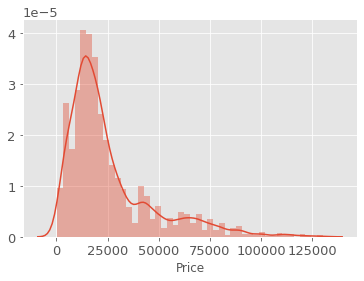

In [0]:
sns.distplot(train['Price'])

In [0]:
train['Price']=np.log(train['Price'])

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [0]:
from sklearn.model_selection import train_test_split
X=train.drop('Price',1)
y=train['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

In [0]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,
        shuffle=True,
        random_state=42)


In [0]:
from tqdm.notebook import tqdm
lr = LinearRegression()
rf =RandomForestRegressor(n_jobs=-1)
xgbm =XGBRegressor()
cbm =CatBoostRegressor()
lgbm =LGBMRegressor()
models = [lr, rf,xgbm ,cbm, lgbm]
for model in tqdm(models):
    scores =cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    print(f'{model}: {scores.mean(), scores.std()} \n')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False): (-2110247716.77023, 4042077310.8600698) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False): (-0.5558041748766434, 0.05225914580027592) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:li

In [0]:
from google.colab import files
uploaded = files.upload()

Saving final_test.csv to final_test.csv


In [0]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
scores=cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [0]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
test= pd.read_csv(io.BytesIO(uploaded['final_test.csv']))
test

,Unnamed: 0,10,100,1000,10x,10xmax,11,116gb,11900,11pro,12,12000,123,124,12500,128,128gb,128gb25000,128gbname54,128gigs,12900,12999,12999rs,12months,12yr,13,13000rs,131,132mp,13900,13mp,14,14499,14999rs,15,15000,15900,15kg,16,16000,16900,16gb,16mp,16mp8mp,18000,18months,19,19500,19k,1month,1st,1year,1yr,20,2016,2018,2019,2020,20900,20999,21500rs,21900,22,22999rs,23,23000,2372017,23900,24,24000,24900,25,2500,25000,256,256gb,256gigs,256gm,25k,29sep2019,2days,2gb,2month,2months,2nd,2xl,2year,2years,30,30000,31000,31999rs,32,3256,32g,32gb,32gbbrand,32gbexcellent,32gbgold,32gbgood,32gbwarrantysealedcodexchange,32gib,32gigz,332,35,35off,364ligflats,38,3g,3gb,3gb16gb,3gb32gb,3i,4000,4000mah,42,42mm,44,44mm,4500,45900,464,464gb,47900,49,4d,4days,4g,4gb,4gb64gb,4gworking,4month,4months,4th,4x,50,5000,512,512gb,55,5500,59900,5c,5inch,5se,5x,6000,6128,6128gbexcellent,632gb,64,64128gb,64g,64gb,64gbbrand,64gbexcellent,64gbsilver,64gib,64gigs,664,66900,678,6gb,6mnts,6month,6months,6plus,6pluse,6s128,6s128gb,6s16,6s32,6sgood,6th,6x,7000,70000,7128gb,7128gbbrand,7128gbcondition,7128gbexcellent,7256gb,7300,732gb,732gbbrand,732gbcondition,732gbexcellent,7499,7500,75000,7a,7c,7cnew,7months,7plus,7pluse,7with,7x,81,8256,8256gb,8300,89,8c,8gb,8inch,8plus,8pro,8x,97,970i,9800,99,9lite,9n,a6000,a6000plus,a6600plus,aayitunde,absolutely,acc,acces,acceseries,accesiories,accesories,accesory,accessoires,accessoriescod,accessorize,accessory,accoceries,acessories,activated,affordable,ahmedabad,ai,air,airpods,all,allclours,almost,along,also,aluminum,amazing,amoled,apple,applee,apply,aptronix,...,pannel,part,payment,perfect,perfectly,performance,pesse,ph2,phab,phn,phoen,phone,phone6s,phone7,phone7pulse256gb,phonecan,phoneno,phones6s767,phonevolte,phonexr,phonexs,pi,pic,piece,pin,pink,pixel,platinum,play,plus,plus64gbbrand,plush,pone,porsche,power,prente,price,priceemi,primary,print,pristine,pro,problem,processing,product,profile,program,project,propely,provided,providing,pune,purani,purchased,pure,quad,quality,ram,ram32gb,rate,reasonble,red,refurbished,remaining,remains,repace,repair,repaired,replace,replaced,replacement,resale,rest,rg,rha,rom,rose,rosegold,royal,running,sale,saleapple,samsung,sapphire,say,scrach,scratch,scratchless,screen,se,seal,sealed,sealedcodemiwarranty,sealedcodemiwarrantyexchenge,second,security,sel,sell,seller,sellexchange,selling,series,series4,serise,service,set,seven,shell,shipping,shop,shot,showroom,side,silver,sim,sing,single,skin,slightly,slleng,small,smart,smartphone,smartphones,software,solution,solved,space,spare,spce,special,sperparts,sport,square,sractches,srap,stainless,start,starting,steel,still,sto,stock,storage,storagepaka,store,stylus,stylush,supe,super,superb,superrare,suport,swapped,sx,temperedglass,thin,thinq,till,tin,tip,today,tom,top,touch,turbo,two,ulo,ultimate,unactivated,unit,unlock,unlocked,unlocking,unopened,unpacked,untouch,untouched,unused,update,updated,upgrading,ur,urgent,urgently,use,used,usedno,using,v30,v40,v50,validity,variant,varient,version,vibe,view,vision,vivo,volta,w30,wanna,want,wanted,waranty,warr,warrantty,warranty,warrantyemiexchange,warrenty,warrnty,watch,week,weekend,well,white,whitesilver,wifi,wifi4g,wight,wireless,withbox,within,without,work,working,wrnty,x2,x64gb,xcell,xr,xr128gb,xrproduct,xs64gb,xsmax,year,yes,yr,z1,z2,zed,zet,zuk,Brand,Locality,City,State,storage.1,warranty.1
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [0]:
test.drop('Unnamed: 0',1,inplace=True)

In [0]:
test=pd.get_dummies(test,columns=['storage.1'])

In [0]:
test.drop(['storage.1_3gb','storage.1_6gb'],1,inplace=True)

In [0]:
#X_train.shape

(1628, 1282)

In [0]:
print(scores.mean())
print(scores.std())

-0.5557391378731031
0.052250050451324685


In [0]:
predictions=rf.predict(test)

In [0]:
y_pred=np.exp(predictions)

In [0]:
final=y_pred
final=pd.DataFrame(final)

In [0]:
final.columns=['Price']

In [0]:
final.to_excel('rfnew.xlsx')

In [0]:
from google.colab import files
files.download('rfnew.xlsx')